# **Music popularity prediction**
#### Walter Sostene Losa - Filippo Finke

In [472]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [473]:
# Read the CSV file
df = pd.read_csv('song_data.csv')

## 1. Dataset description

In [474]:
# Print null values
print(df.isnull().sum())

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64


In [475]:
# Display the first few rows of the DataFrame
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [476]:
# Describe the DataFrame
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [477]:
# Display the shape of the DataFrame
df.shape

(18835, 15)

In [478]:
# Display info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [479]:
# Keep only numerical columns int64 and float64
df = df.select_dtypes(include=['int64', 'float64'])

In [480]:
# Check for missing values
df.isnull().sum()

song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [481]:
# Check data types
df.dtypes

song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [482]:
#Checking number of unique rows in each feature
df.nunique().sort_values()

song_popularity         2
audio_mode              2
time_signature          5
key                    12
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

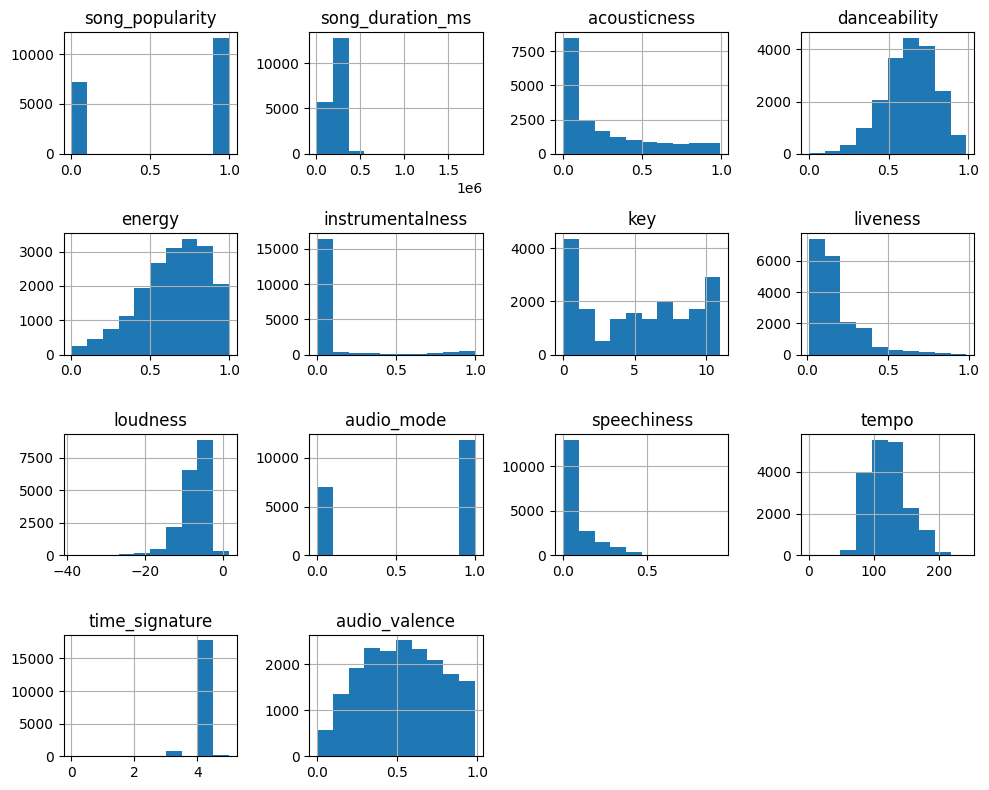

In [483]:
# Display the columns
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

## 2. Dataset analysis

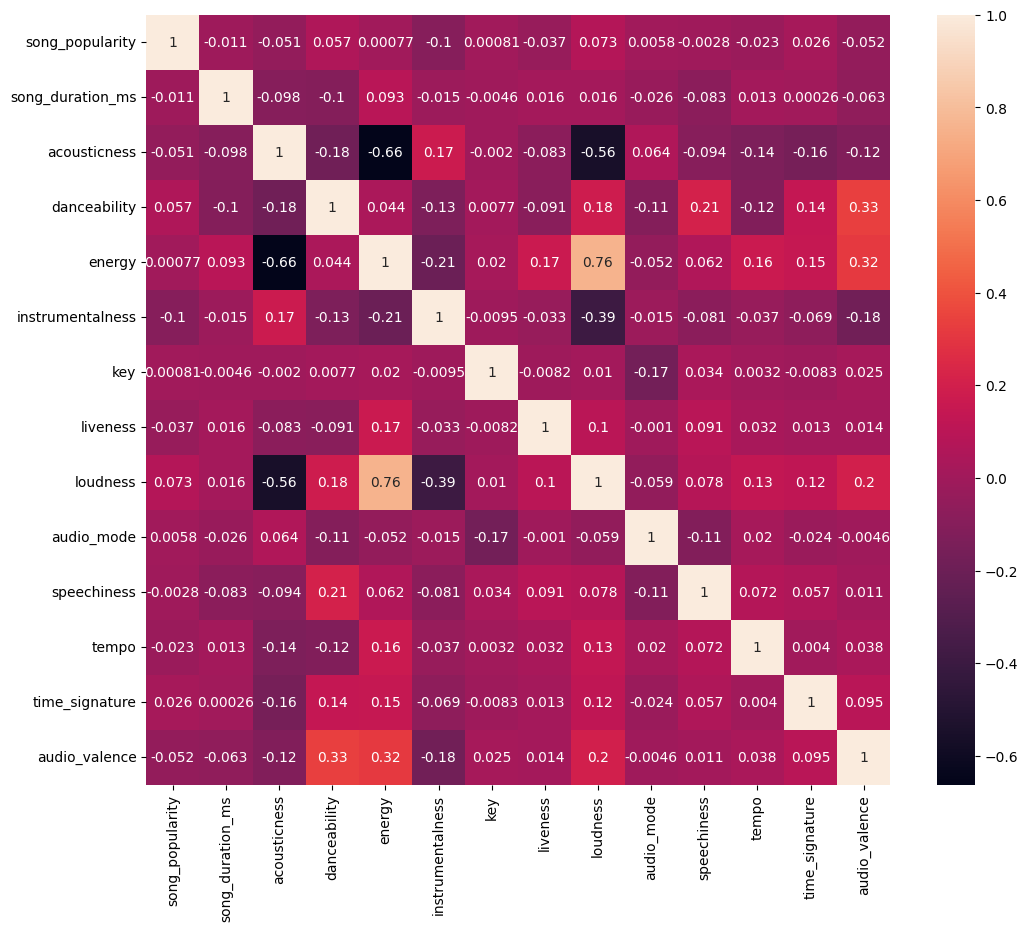

In [484]:
# Print the correlation matrix chart
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)
plt.show()

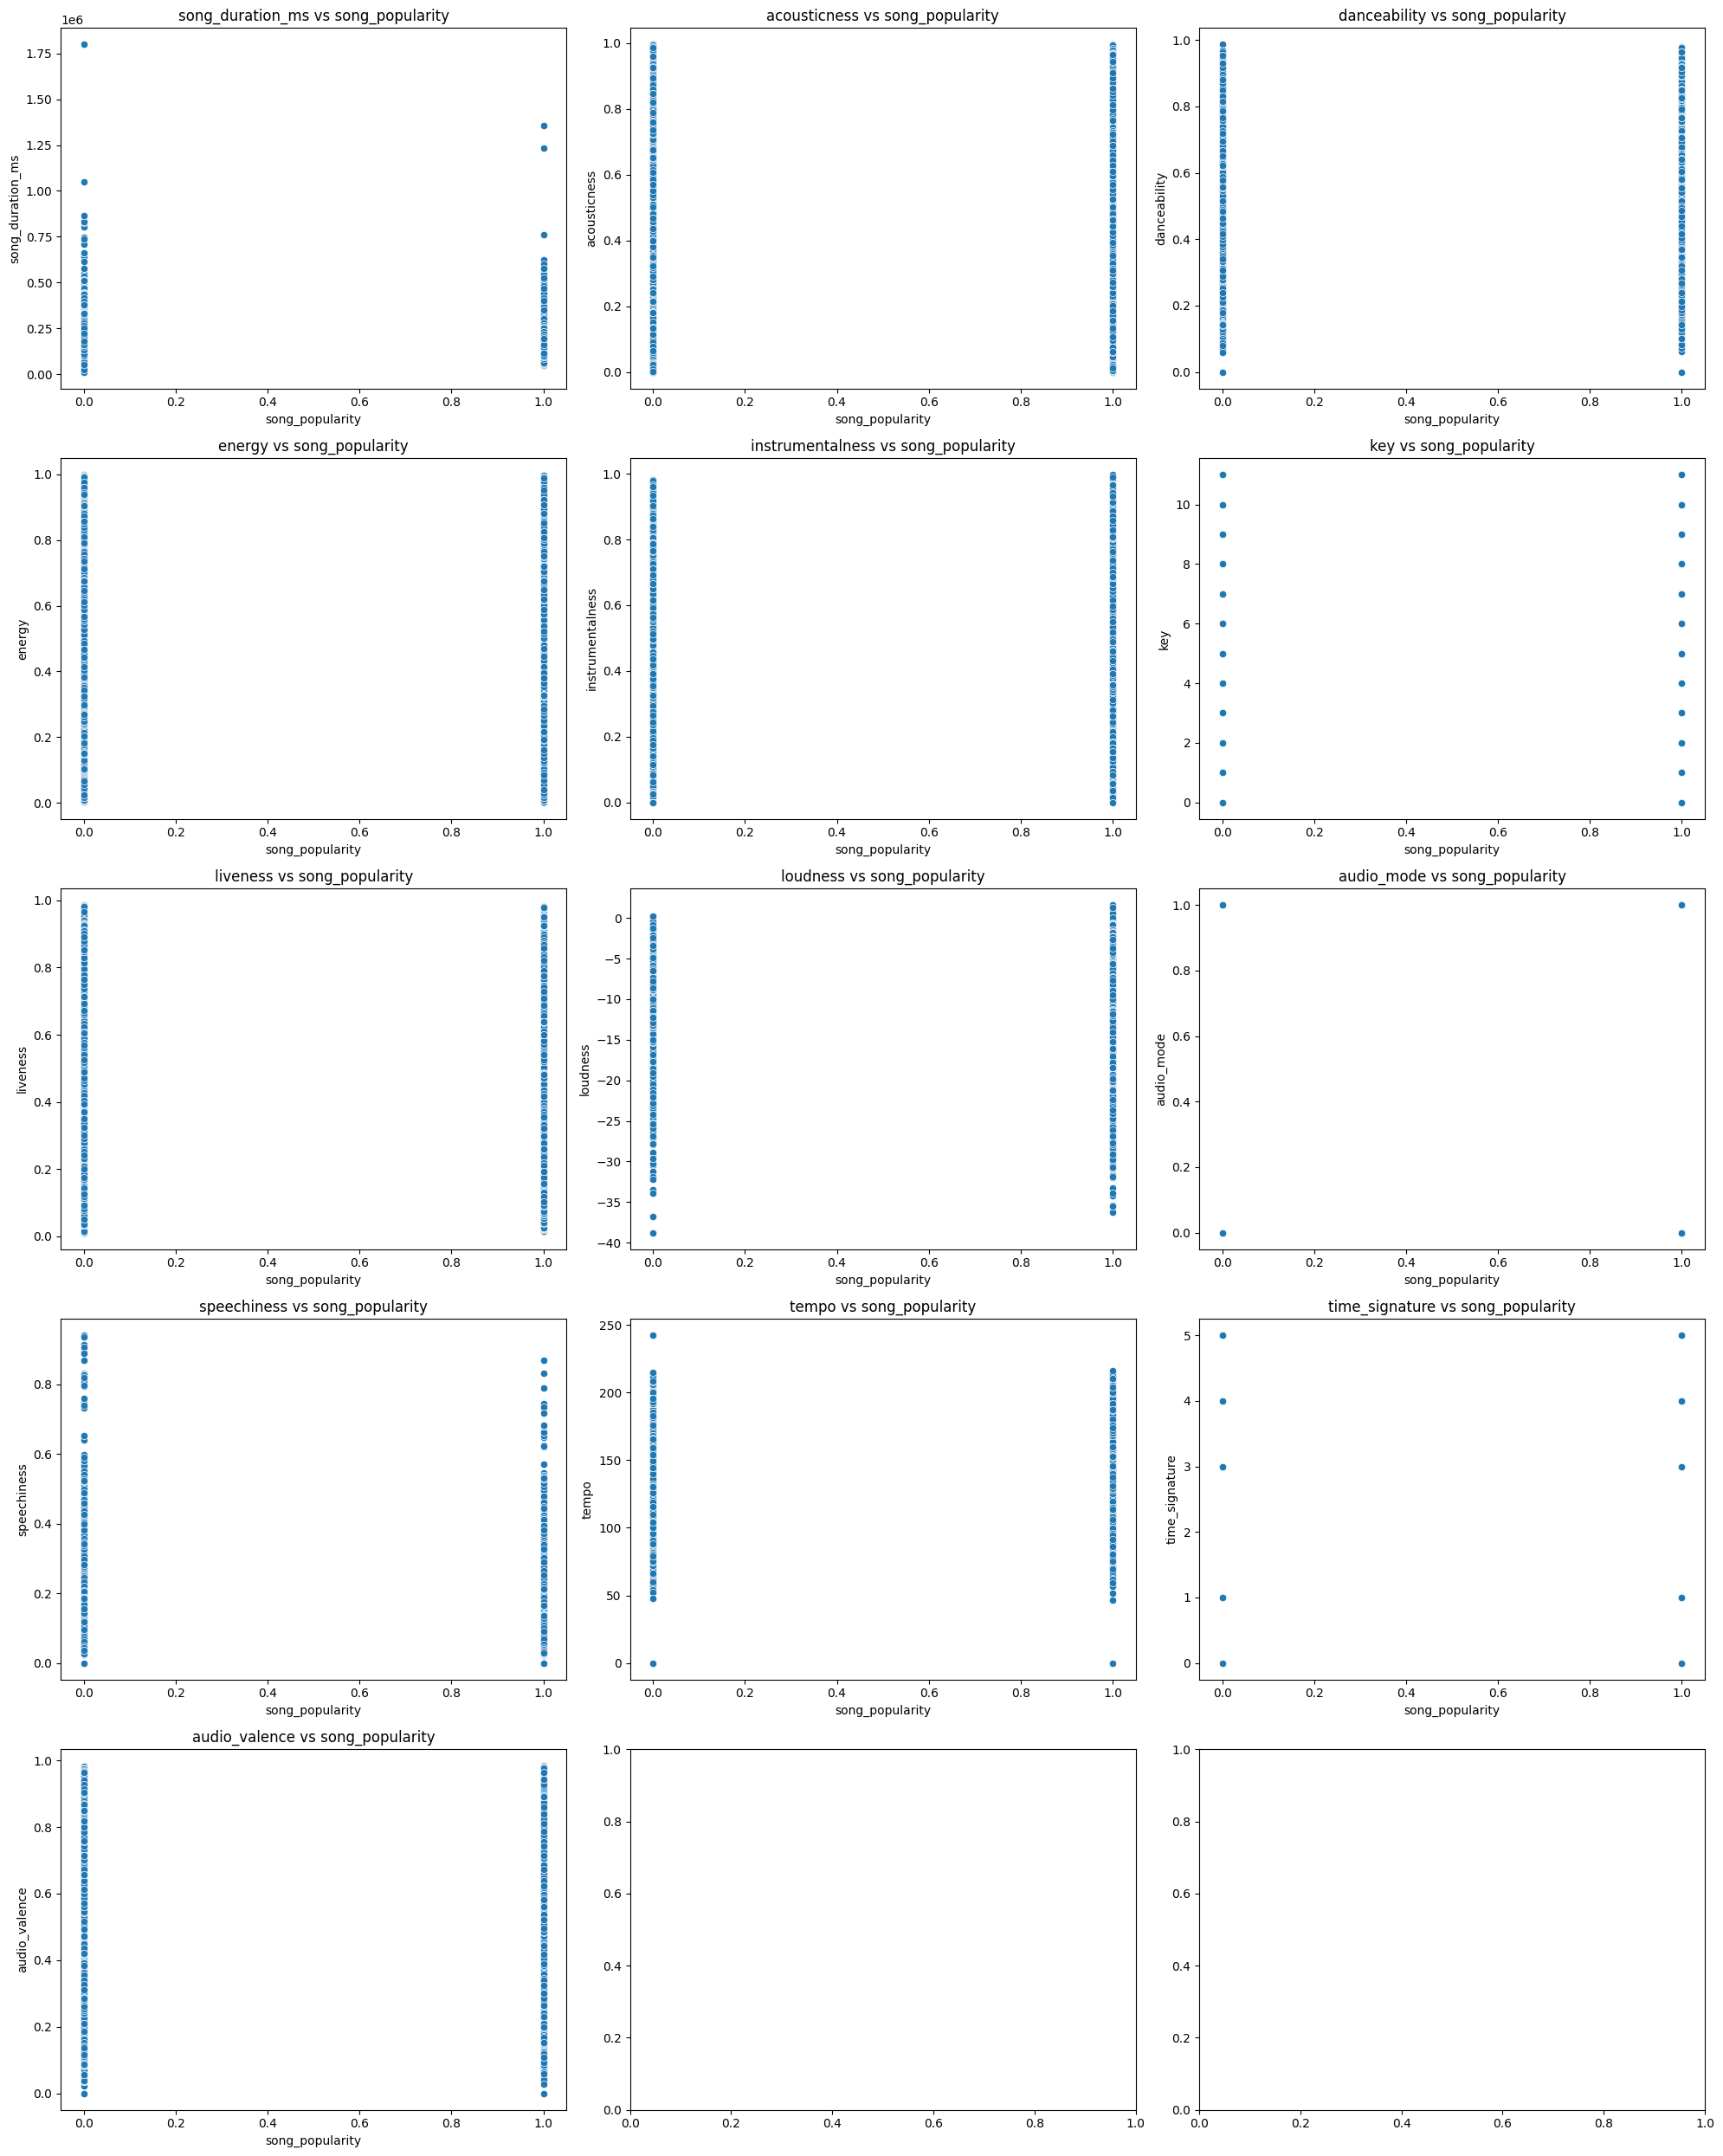

In [485]:
features = [col for col in df.columns if col != 'song_popularity']

num_rows = (len(features) + 3) // 3
num_cols = min(len(features), 3)    

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Flatten axes if necessary
if num_rows == 1:
    axes = axes.reshape(1, -1)
elif num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot each feature against song_popularity
for i, column in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(data=df, y=column, x='song_popularity', ax=axes[row, col])
    axes[row, col].set_title(f'{column} vs song_popularity')

# Adjust layout
plt.tight_layout()
plt.show()

In [486]:
# Find the correlation values with the target variable

threshold = 0.08

correlation_with_target = abs(corr['song_popularity'])

useful_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

df = df.drop(columns=[col for col in df.columns if col not in useful_features])

print("Useful features:", df.columns.tolist())

Useful features: ['song_popularity', 'instrumentalness']


In [487]:
# Train a GridSearchCV model

from sklearn.model_selection import train_test_split

# Make so that song_popularity is will be a classification problem with 2 classes 
# (0 for unpopular songs and 1 for popular songs)

X = df.drop(columns='song_popularity')
y = df['song_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

# Evaluate the model

from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.25      0.34      1454
           1       0.64      0.85      0.73      2313

    accuracy                           0.62      3767
   macro avg       0.58      0.55      0.53      3767
weighted avg       0.59      0.62      0.58      3767

